# EDA: Chipotle

### We have data on what people order at Chipotle

- How much do people spend on average at Chipotle?
- Do people prefer bowls or burritos?
- What percentage of people order drinks?

In [2]:
library(tidyverse)
df = read.csv("https://raw.githubusercontent.com/byoungwookjang/stats306_labs/master/lab3/chipotle.csv", stringsAsFactors = F)

In [4]:
head(df)

X,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98


## Remove unneccessary information from your data

In [7]:
df <- df  %>% select(-X)

## Take a glimpse at your data

In [9]:
summary(df)

    order_id         quantity       item_name         choice_description
 Min.   :   1.0   Min.   : 1.000   Length:4622        Length:4622       
 1st Qu.: 477.2   1st Qu.: 1.000   Class :character   Class :character  
 Median : 926.0   Median : 1.000   Mode  :character   Mode  :character  
 Mean   : 927.3   Mean   : 1.076                                        
 3rd Qu.:1393.0   3rd Qu.: 1.000                                        
 Max.   :1834.0   Max.   :15.000                                        
  item_price       
 Length:4622       
 Class :character  
 Mode  :character  
                   
                   
                   

In [10]:
glimpse(df)

Observations: 4,622
Variables: 5
$ order_id           <int> 1, 1, 1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...
$ quantity           <int> 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ item_name          <chr> "Chips and Fresh Tomato Salsa", "Izze", "Nantuck...
$ choice_description <chr> "", "[Clementine]", "[Apple]", "", "[Tomatillo-R...
$ item_price         <chr> "$2.39 ", "$3.39 ", "$3.39 ", "$2.39 ", "$16.98 ...


## Q1: What are the top 5 most popular items on the menu?

In [14]:
df  %>% 
    group_by(item_name) %>% 
    summarise(count = n())  %>% 
    arrange(desc(count))

item_name,count
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Chips,211
Steak Bowl,211
Bottled Water,162
Chicken Soft Tacos,115
Chicken Salad Bowl,110


## Question 2: Fix the data so that Chips + Roasted Chili Corn are counted correctly

In [13]:
df <- df  %>% 
    mutate(item_name = ifelse(
        item_name == "Chips and Roasted Chili-Corn Salsa",
        "Chips and Roasted Chili Corn Salsa",
        item_name
                             )
          )

## Question 3: Can we convert item_price to a number? (Regular expressions!)
- https://rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf

In [16]:
str_extract("$10.54", "[0-9]+\\.{0,1}[0-9]*")

[1] "10.54"

In [17]:
str_extract("$10", "[0-9]+\\.{0,1}[0-9]*")

[1] "10"

In [22]:
str_extract("$10", "[0-9]+\\.[0-9]+")

[1] NA

In [29]:
str_sub("$10.54", 2)

[1] "10.54"

In [32]:
df <- df  %>% 
    mutate(item_price = as.numeric(str_extract(item_price, "[0-9]+\\.{0,1}[0-9]*")))

In [33]:
df  %>% head()

order_id,quantity,item_name,choice_description,item_price
1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,Izze,[Clementine],3.39
1,1,Nantucket Nectar,[Apple],3.39
1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98


In [37]:
head(df)$item_price + 1

[1]  3.39  4.39  4.39  3.39 17.98 11.98

In [39]:
df  %>% head()

order_id,quantity,item_name,choice_description,item_price
1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,Izze,[Clementine],3.39
1,1,Nantucket Nectar,[Apple],3.39
1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98


## Q4: Construct a table where for each item we have the name of the item, amount sold, revenue, mean price, max price, and min price. Arrange in decreasing order of amount sold. Only list a few items.

item_name,sold,revenue,meanprice,maxprice,minprice
Chicken Bowl,761,7342.73,10.113953,32.94,8.19
Chicken Burrito,591,5575.82,10.082857,35.00,8.19
Chips and Guacamole,506,2201.04,4.595073,17.80,3.89
Steak Burrito,386,3851.43,10.465842,27.75,8.69
Canned Soft Drink,351,438.75,1.457641,5.00,1.25
Chips,230,494.34,2.342844,6.45,1.99


## Q5: Note that it makes no sense for the max price of a bowl to be 33. Why does this happen? Adjust your code so that the mean, max, and min actually represent what we want them to represent. 

item_name,revenue,itemsold,meanprice,maxprice,minprice
Chicken Bowl,7342.73,761,9.657727,11.25,8.19
Chicken Burrito,5575.82,591,9.475949,11.25,8.19
Chips and Guacamole,2201.04,506,4.345616,4.45,3.89
Steak Burrito,3851.43,386,9.993424,11.75,8.69
Canned Soft Drink,438.75,351,1.250000,1.25,1.25
Chips,494.34,230,2.149242,2.15,1.99


## Q6: What is the total price for each order? Make a histogram of price per order.

order_id,totalprice
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
6,17.50


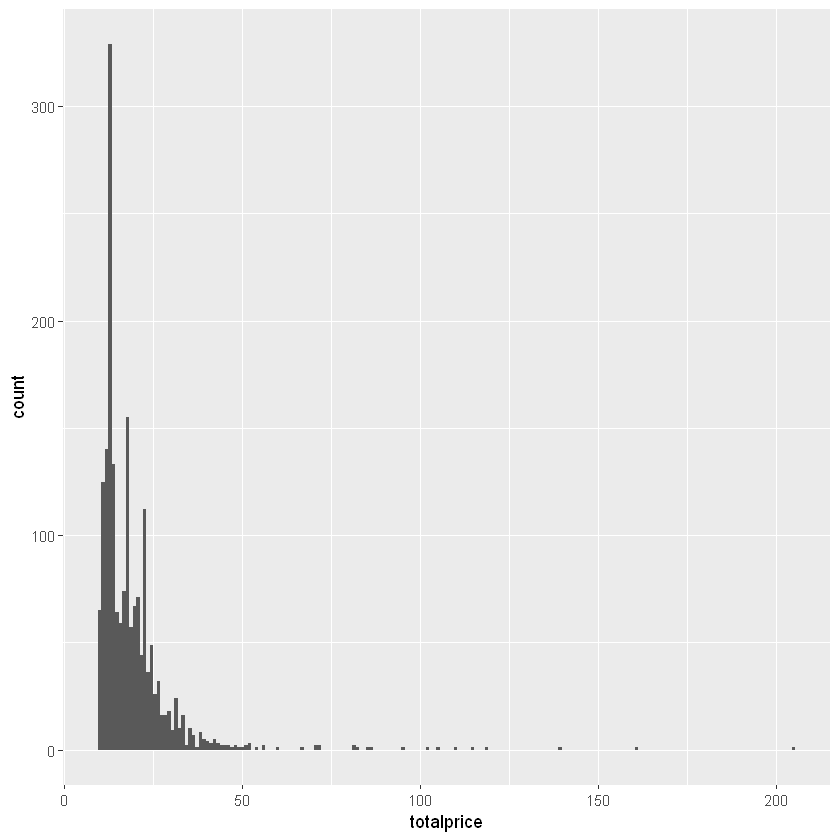

## Q7: Note that the tail of the histogram is very long and distorts the image. Filter so that we only examine orders with price less than 50, then replot. 

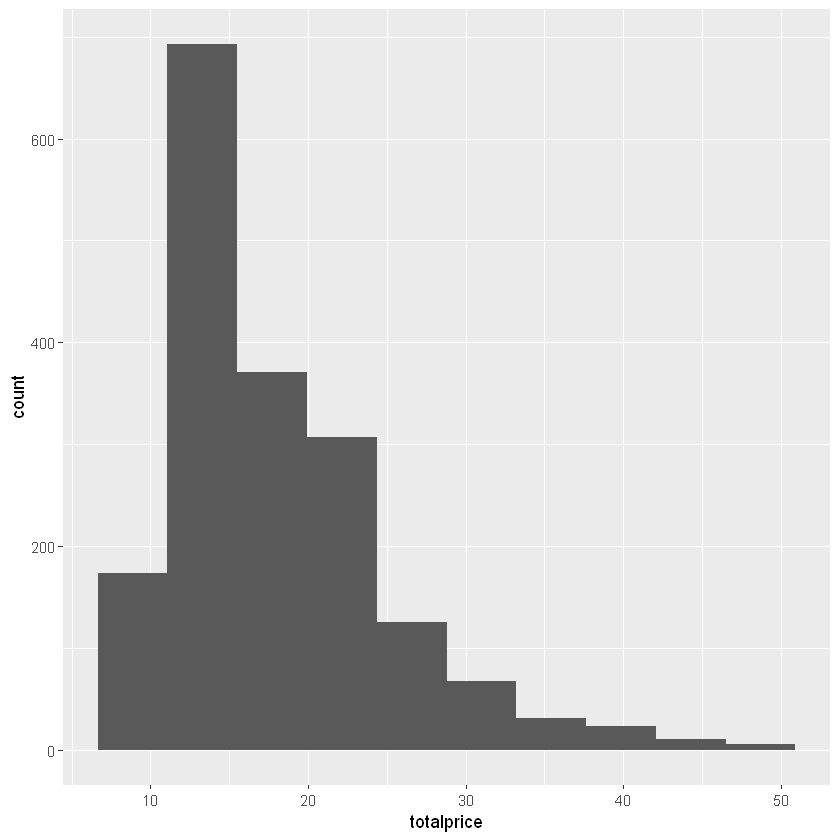

## Q8: What percent of orders included drinks? 

In [65]:
df  %>% 
    filter(str_detect(item_name, "Drink"))

n()
330


[1] 1834

[1] 0.1799346

## Q9: Are burritos or bowls more popular? Suggestion: Try nesting ifelse and using str_detect. 

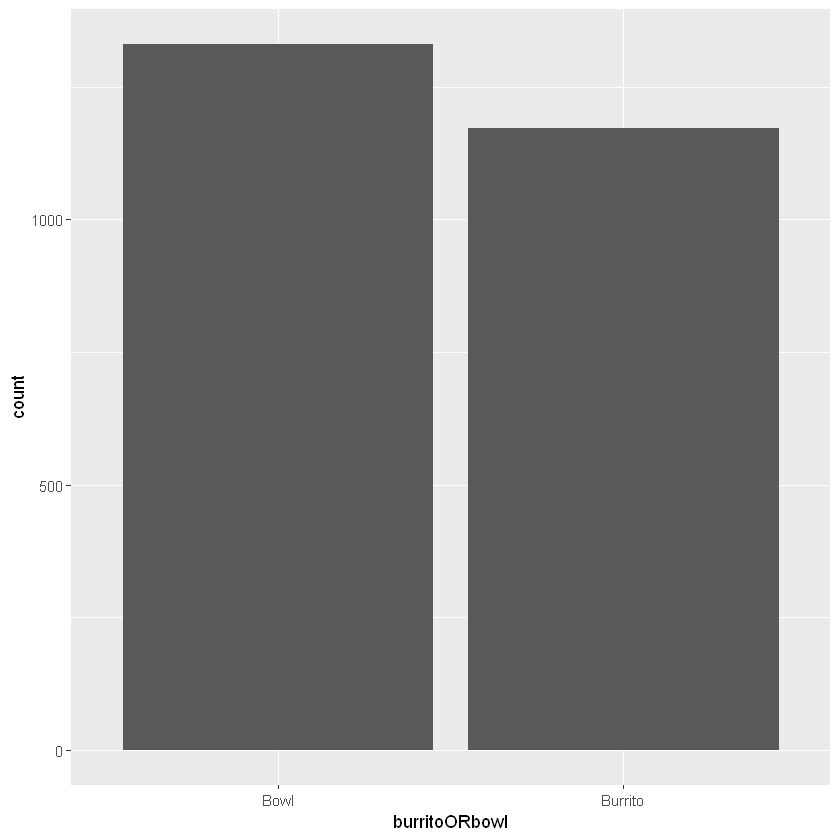